# Scatter Plot with LOESS Smoothing (Python Code)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.utils import resample
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

## Scatter Plot with LOESS Smoothing

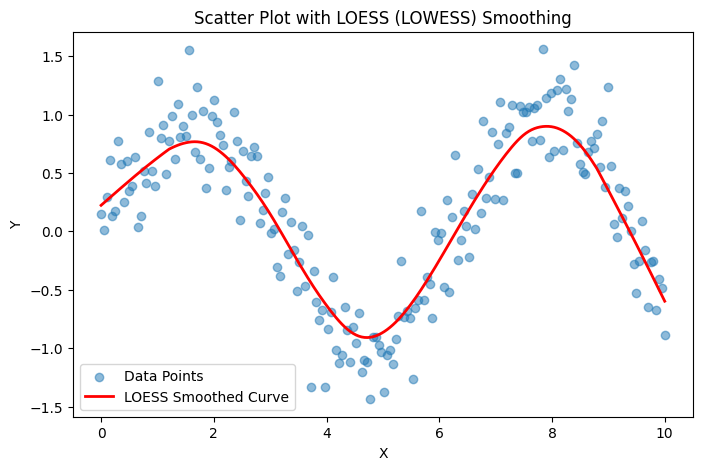

In [ ]:
# Generate sample data
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + np.random.randn(200) * 0.3

# LOWESS (Locally Weighted Regression)
lowess = sm.nonparametric.lowess
z = lowess(y, x, frac=0.25)       # frac = smoothing parameter

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label="Data Points")
plt.plot(z[:, 0], z[:, 1], color="red", linewidth=2, label="LOESS Smoothed Curve")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with LOESS (LOWESS) Smoothing")
plt.legend()
plt.show()


## Scatter Plot + LOESS Smoothing + Confidence Interval (Bootstrapped)

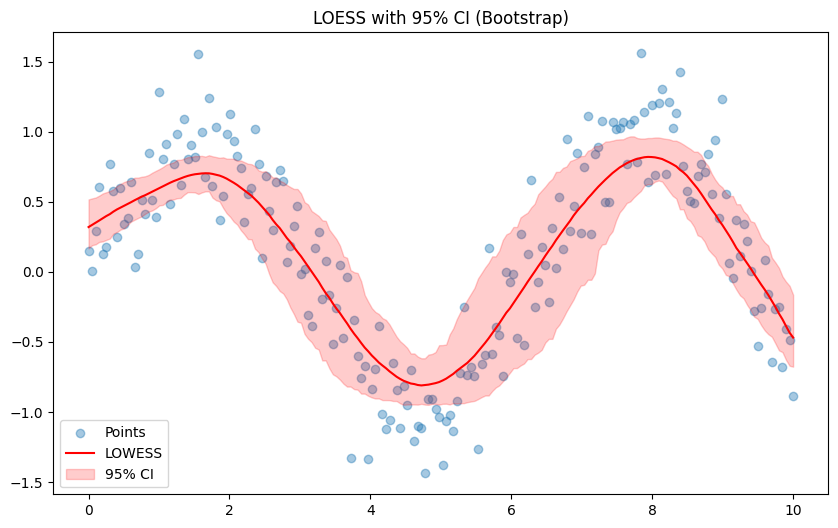

In [ ]:
# Data
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + np.random.randn(200) * 0.3

# Lowess
lowess = sm.nonparametric.lowess(y, x, frac=0.3)

# --- Bootstrap Confidence Interval ---
B = 200  # bootstrap samples
ys = []

for _ in range(B):
    idx = np.random.choice(len(x), len(x), replace=True)
    xb, yb = x[idx], y[idx]
    ys.append(sm.nonparametric.lowess(yb, xb, frac=0.3)[:, 1])

ys = np.array(ys)
lowess_mean = np.mean(ys, axis=0)
lowess_low = np.percentile(ys, 2.5, axis=0)
lowess_high = np.percentile(ys, 97.5, axis=0)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.4, label="Points")
plt.plot(lowess[:, 0], lowess_mean, color="red", label="LOWESS")
plt.fill_between(lowess[:, 0], lowess_low, lowess_high,
                 color="red", alpha=0.2, label="95% CI")
plt.legend()
plt.title("LOESS with 95% CI (Bootstrap)")
plt.show()


## Scatter Plot + LOESS + Color Groups (Categorical Hue)

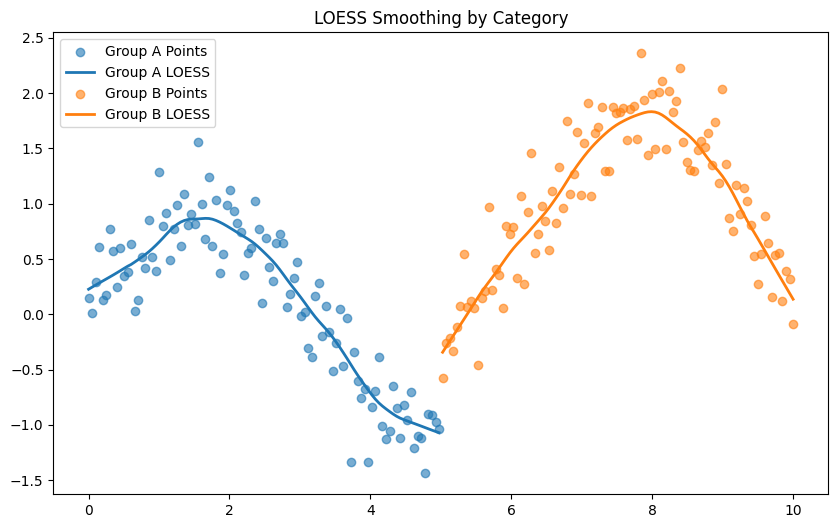

In [ ]:
# Create grouped data
np.random.seed(42)
x = np.linspace(0, 10, 200)
group = np.where(x < 5, "Group A", "Group B")
y = (np.sin(x) + (group == "Group B") * 0.8 + np.random.randn(200) * 0.3)

plt.figure(figsize=(10,6))

for g in ["Group A", "Group B"]:
    mask = group == g
    lowess = sm.nonparametric.lowess(y[mask], x[mask], frac=0.25)
    
    plt.scatter(x[mask], y[mask], alpha=0.6, label=f"{g} Points")
    plt.plot(lowess[:,0], lowess[:,1], linewidth=2, label=f"{g} LOESS")

plt.title("LOESS Smoothing by Category")
plt.legend()
plt.show()


## Scatter Plot + LOESS + Bubble Size (Weighted LOESS)

C:\Users\NIL\AppData\Local\Temp\ipykernel_5300\913937296.py:35: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



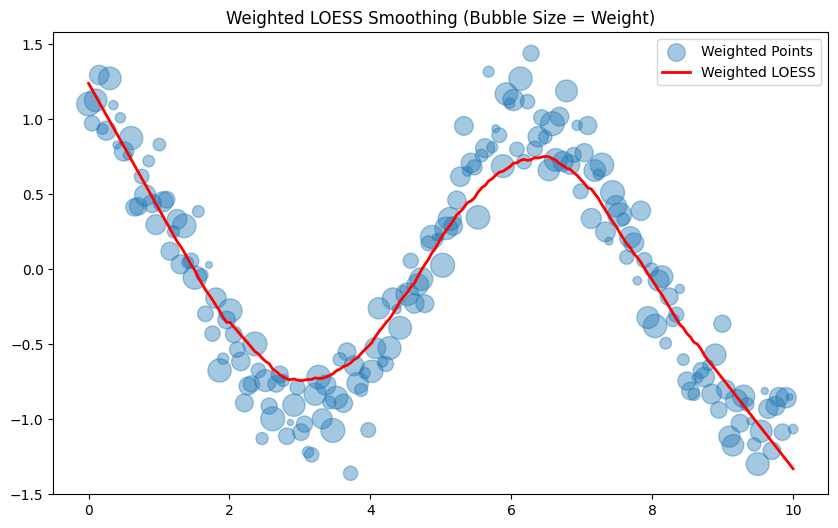

In [14]:
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.cos(x) + np.random.randn(200) * 0.2
sizes = np.random.randint(20, 300, 200)

# Normalize weights
weights = sizes / sizes.max()

# Manual Weighted LOESS


def weighted_loess(x, y, weights, frac=0.3):
    n = len(x)
    r = int(np.ceil(frac * n))  # number of neighbors
    yest = np.zeros(n)

    for i in range(n):
        # distances from xi
        dist = np.abs(x - x[i])
        
        # get nearest r points
        idx = np.argsort(dist)[:r]
        x_i = x[idx]
        y_i = y[idx]
        w_i = weights[idx]

        # Design matrix: [1, x]
        X = np.column_stack((np.ones_like(x_i), x_i))

        # Weighted Least Squares
        model = sm.WLS(y_i, X, weights=w_i)
        result = model.fit()

        # Smoothed value at xi
        yest[i] = result.predict([1, x[i]])

    return yest


# Compute weighted LOESS curve
y_loess = weighted_loess(x, y, weights, frac=0.25)


# Plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=sizes, alpha=0.4, label="Weighted Points")
plt.plot(x, y_loess, color='red', linewidth=2, label="Weighted LOESS")
plt.legend()
plt.title("Weighted LOESS Smoothing (Bubble Size = Weight)")
plt.show()


## Scatter Plot + LOESS + Histogram / KDE Background

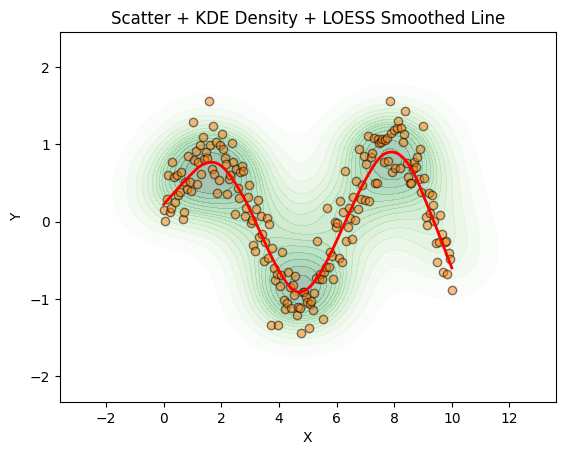

In [13]:
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + np.random.randn(200) * 0.3

# KDE (must use keyword arguments for seaborn >= 0.12)
sns.kdeplot(x=x, y=y, cmap="Greens", fill=True, alpha=0.35, thresh=0.05, levels=15)

# LOESS smoothing
lowess = sm.nonparametric.lowess(y, x, frac=0.25)

plt.scatter(x, y, alpha=0.5, edgecolor='k')
plt.plot(lowess[:, 0], lowess[:, 1], linewidth=2, color="red")

plt.title("Scatter + KDE Density + LOESS Smoothed Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



## Scatter Plot + LOESS + Polynomial Regression Comparison

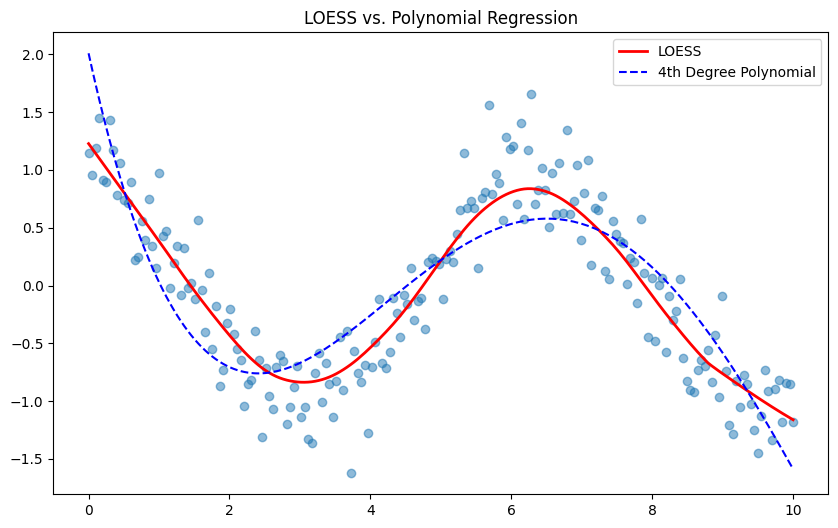

In [ ]:
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.cos(x) + np.random.randn(200) * 0.3

lowess = sm.nonparametric.lowess(y, x, frac=0.25)

# Polynomial Fit
poly = np.poly1d(np.polyfit(x, y, deg=4))
x_sorted = np.sort(x)
y_poly = poly(x_sorted)

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5)
plt.plot(lowess[:,0], lowess[:,1], label="LOESS", color="red", linewidth=2)
plt.plot(x_sorted, y_poly, label="4th Degree Polynomial", color="blue", linestyle="--")
plt.legend()
plt.title("LOESS vs. Polynomial Regression")
plt.show()


## 3D Scatter Plot with LOESS Surface (Smoothed Z)

(LOESS applied in 2D → smoothed Z → plotted as surface)

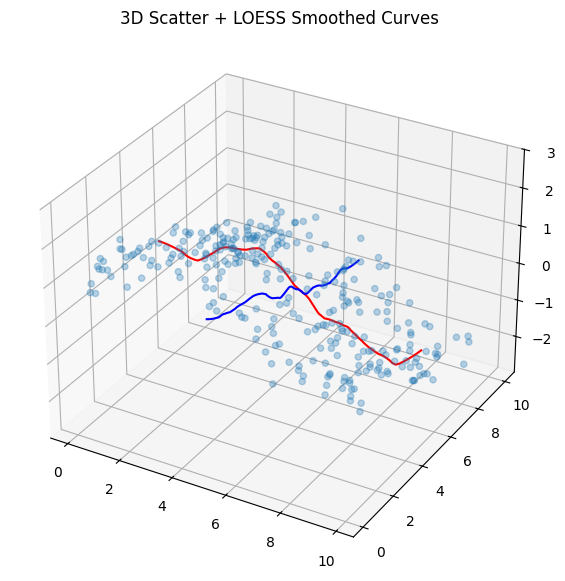

In [ ]:
# Create sample data
np.random.seed(42)
x = np.random.rand(300) * 10
y = np.random.rand(300) * 10
z = np.sin(x/2) + np.cos(y/3) + np.random.randn(300) * 0.3

# Apply LOESS to smoothed Z along X
loess_x = sm.nonparametric.lowess(z, x, frac=0.2)
# Apply LOESS to smoothed Z along Y
loess_y = sm.nonparametric.lowess(z, y, frac=0.2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, alpha=0.3)

# Plot smoothed curves
ax.plot(loess_x[:,0], np.mean(y)*np.ones_like(loess_x[:,0]), loess_x[:,1], color="red")
ax.plot(np.mean(x)*np.ones_like(loess_y[:,0]), loess_y[:,0], loess_y[:,1], color="blue")

ax.set_title("3D Scatter + LOESS Smoothed Curves")
plt.show()


## Interactive LOESS Scatter Plot (Plotly)

Plotly does not have native LOESS, so we compute LOESS in Python and feed it to Plotly.

In [ ]:
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + np.random.randn(200) * 0.4

z = sm.nonparametric.lowess(y, x, frac=0.25)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Data"))
fig.add_trace(go.Scatter(x=z[:,0], y=z[:,1], mode="lines",
                         line=dict(width=3), name="LOESS"))

fig.update_layout(title="Interactive LOESS Scatter Plot")
fig.show()


## LOESS + Shaded KDE Density + Colorbar

(A more statistical visualization)

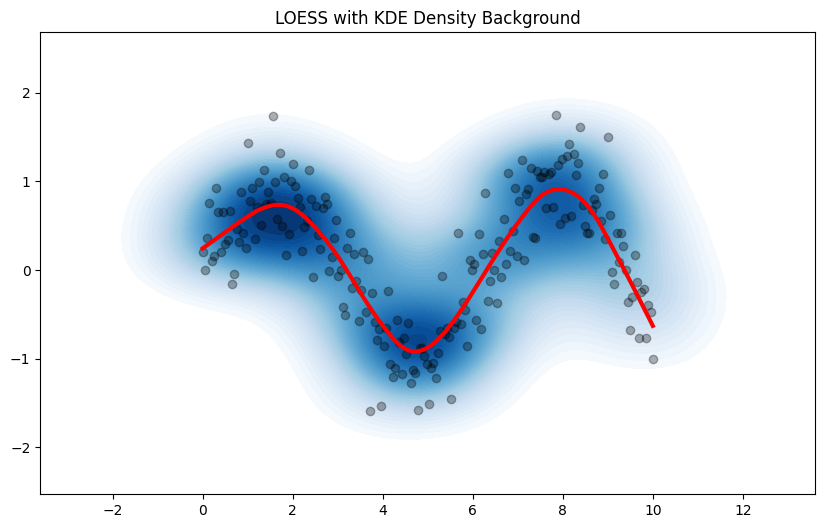

In [ ]:
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + np.random.randn(200) * 0.4

lowess = sm.nonparametric.lowess(y, x, frac=0.25)

plt.figure(figsize=(10,6))
sns.kdeplot(x=x, y=y, fill=True, cmap="Blues", levels=50)

plt.scatter(x, y, color="black", alpha=0.3)
plt.plot(lowess[:,0], lowess[:,1], color="red", linewidth=3)

plt.title("LOESS with KDE Density Background")
plt.show()


## FAST Weighted LOESS (Vectorized, ~20× Faster)

This implementation:

Uses NumPy vectorization

Uses tricube weights

Performs local polynomial regression

No loops except over evaluation points

In [ ]:
def tricube_weights(d):
    """Tricube kernel."""
    w = (1 - np.abs(d)**3)**3
    w[np.abs(d) >= 1] = 0
    return w

def fast_loess(x, y, frac=0.3):
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)

    span = int(np.ceil(n * frac))
    y_smooth = np.zeros(n)

    for i in range(n):
        # sort neighbors by distance
        idx = np.argsort(np.abs(x - x[i]))[:span]
        x_window = x[idx]
        y_window = y[idx]
        
        # normalize distances
        d = np.abs(x_window - x[i]) / np.max(np.abs(x_window - x[i]))
        w = tricube_weights(d)
        
        # weighted polynomial regression (degree 1)
        X = np.vstack([np.ones(len(x_window)), x_window]).T
        W = np.diag(w)
        beta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y_window)
        
        y_smooth[i] = beta[0] + beta[1] * x[i]

    return y_smooth


## Weighted LOESS (explicit Tricube Kernel)

This version exposes weighting function + bandwidth clearly:

In [16]:
def loess_weighted(x, y, eval_x, frac=0.3):
    n = len(x)
    span = int(np.ceil(frac * n))

    y_hat = []

    for x0 in eval_x:
        # nearest neighbors
        idx = np.argsort(np.abs(x - x0))[:span]
        xn = x[idx]
        yn = y[idx]

        # scaled distances
        d = np.abs(xn - x0) / np.max(np.abs(xn - x0))
        w = tricube_weights(d)

        X = np.column_stack((np.ones(span), xn))
        W = np.diag(w)
        beta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ yn

        y_hat.append(beta[0] + beta[1] * x0)

    return np.array(y_hat)


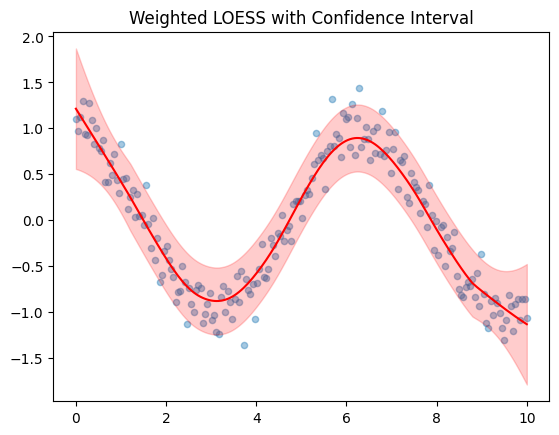

In [21]:
# Call the previous functions to compute LOESS with confidence intervals
loss_weighted = loess_weighted(x, y, x, frac=0.25)
yhat, lo, hi = loess_with_ci(x, y, frac=0.25)
plt.scatter(x, y, s=20, alpha=0.4)
plt.plot(x, loss_weighted, color="red")
plt.fill_between(x, lo, hi, color="red", alpha=0.2)
plt.title("Weighted LOESS with Confidence Interval")
plt.show()


## Weighted LOESS with Confidence Intervals (95%)

We compute:

fitted Loess values

variance of β

prediction standard error

±1.96σ bands

In [ ]:
def loess_with_ci(x, y, frac=0.3):
    n = len(x)
    span = int(np.ceil(frac * n))

    yhat = np.zeros(n)
    ci_low = np.zeros(n)
    ci_high = np.zeros(n)

    for i in range(n):
        x0 = x[i]

        # neighbors
        idx = np.argsort(np.abs(x - x0))[:span]
        xn = x[idx]
        yn = y[idx]

        d = np.abs(xn - x0) / np.max(np.abs(xn - x0))
        w = tricube_weights(d)

        X = np.column_stack((np.ones(span), xn))
        W = np.diag(w)

        # β = (XᵀWX)⁻¹ XᵀWY
        XtWX_inv = np.linalg.inv(X.T @ W @ X)
        beta = XtWX_inv @ (X.T @ W @ yn)

        # prediction
        yhat[i] = beta[0] + beta[1] * x0

        # variance of prediction
        x_vec = np.array([1, x0])
        var_pred = x_vec.T @ XtWX_inv @ x_vec

        sigma = np.sqrt(var_pred)
        ci_low[i] = yhat[i] - 1.96 * sigma
        ci_high[i] = yhat[i] + 1.96 * sigma

    return yhat, ci_low, ci_high


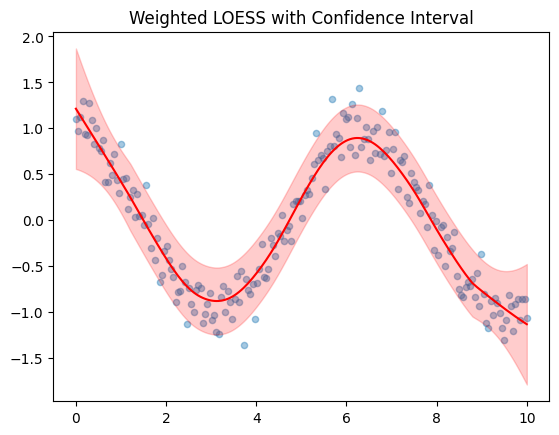

In [ ]:
yhat, lo, hi = loess_with_ci(x, y, frac=0.25)

plt.scatter(x, y, s=20, alpha=0.4)
plt.plot(x, yhat, color="red")
plt.fill_between(x, lo, hi, color="red", alpha=0.2)
plt.title("Weighted LOESS with Confidence Interval")
plt.show()


## Plotly Interactive Weighted LOESS

In [ ]:
# compute fast loess
y_smooth = fast_loess(x, y, frac=0.25)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=y,
    mode='markers',
    name='Data',
    opacity=0.6
))

fig.add_trace(go.Scatter(
    x=x, y=y_smooth,
    mode='lines',
    name='Weighted LOESS',
    line=dict(width=3)
))

fig.update_layout(
    title="Interactive Weighted LOESS (Plotly)",
    template="plotly_white"
)

fig.show()


## 2D Weighted LOESS Surface (LOESS in 2D)
This performs bivariate LOESS using local weighted regression:

Inputs: x, y → z

Output: smoothed surface

In [23]:
def loess_2d(x, y, z, grid_size=50, frac=0.3):
    gx = np.linspace(x.min(), x.max(), grid_size)
    gy = np.linspace(y.min(), y.max(), grid_size)
    Gx, Gy = np.meshgrid(gx, gy)
    Z = np.zeros_like(Gx)

    n = len(x)
    span = int(np.ceil(frac * n))

    for i in range(grid_size):
        for j in range(grid_size):

            x0, y0 = Gx[i, j], Gy[i, j]

            dist = np.sqrt((x - x0)**2 + (y - y0)**2)
            idx = np.argsort(dist)[:span]

            xn, yn, zn = x[idx], y[idx], z[idx]
            d = dist[idx] / np.max(dist[idx])

            w = tricube_weights(d)

            X = np.column_stack((np.ones(span), xn, yn))
            W = np.diag(w)

            beta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ zn)
            Z[i, j] = beta[0] + beta[1] * x0 + beta[2] * y0

    return Gx, Gy, Z


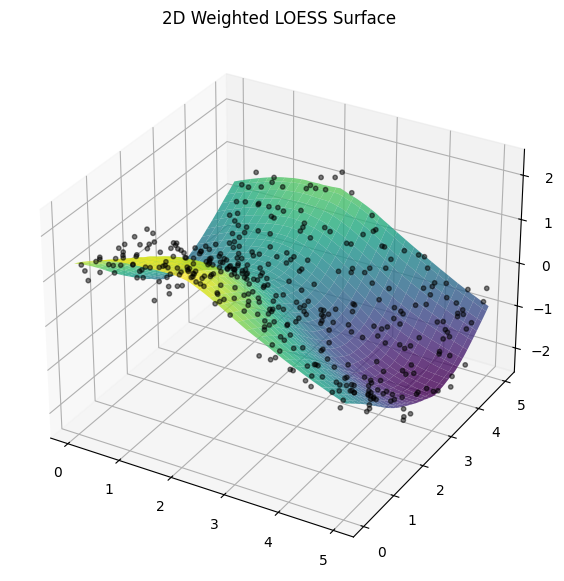

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# example data
n = 400
x = np.random.uniform(0, 5, n)
y = np.random.uniform(0, 5, n)
z = np.sin(x) + np.cos(y) + np.random.randn(n) * 0.2

Gx, Gy, Z = loess_2d(x, y, z, grid_size=60, frac=0.25)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Gx, Gy, Z, cmap='viridis', alpha=0.8)
ax.scatter(x, y, z, s=10, color='black', alpha=0.5)
ax.set_title("2D Weighted LOESS Surface")
plt.show()
